<a href="https://colab.research.google.com/github/martinalegre77/data_analytics/blob/main/PreprocesadoInformacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesado de Información

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_sanidad_nueva_serie.csv')
df

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
0,2020-01-01,0,No consta,0,0,0,0
1,2020-01-01,1,Andalucía,0,0,3,0
2,2020-01-01,2,Aragón,0,0,0,0
3,2020-01-01,3,Asturias,0,0,0,0
4,2020-01-01,4,Baleares,0,0,0,0
...,...,...,...,...,...,...,...
17895,2022-06-13,15,Navarra,0,0,0,0
17896,2022-06-13,16,País Vasco,24,0,0,0
17897,2022-06-13,17,La Rioja,0,0,0,0
17898,2022-06-13,18,Ceuta,0,0,0,0


In [3]:
df.shape

(17900, 7)

In [4]:
df.columns

Index(['Fecha', 'cod_ine', 'CCAA', 'Casos', 'Fallecidos', 'Hospitalizados',
       'UCI'],
      dtype='object')

In [5]:
df.describe()

,cod_ine,Casos,Fallecidos,Hospitalizados,UCI
count,17900.000000,17900.000000,17900.000000,17900.000000,17900.000000
mean,9.500000,701.181117,5.992849,31.033575,2.849274
std,5.766442,2050.009736,15.469072,72.410115,6.307525
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.750000,25.000000,0.000000,2.000000,0.000000
50%,9.500000,143.000000,1.000000,10.000000,1.000000
75%,14.250000,559.000000,5.000000,32.000000,3.000000
max,19.000000,46320.000000,334.000000,1939.000000,135.000000


# Valores missing

In [6]:
df.isna()

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
17895,False,False,False,False,False,False,False
17896,False,False,False,False,False,False,False
17897,False,False,False,False,False,False,False
17898,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

Fecha             0
cod_ine           0
CCAA              0
Casos             0
Fallecidos        0
Hospitalizados    0
UCI               0
dtype: int64

In [8]:
# Acceso a los missing
# df[df.Casos.isna()]

# Completo el missing con 0
# df['Casos'] = df['Casos'].fillna(0)

# Outliers

In [9]:
df.columns

Index(['Fecha', 'cod_ine', 'CCAA', 'Casos', 'Fallecidos', 'Hospitalizados',
       'UCI'],
      dtype='object')

In [10]:
num_cols =['Casos', 'Fallecidos', 'Hospitalizados', 'UCI']
df[num_cols]

,Casos,Fallecidos,Hospitalizados,UCI
0,0,0,0,0
1,0,0,3,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
17895,0,0,0,0
17896,24,0,0,0
17897,0,0,0,0
17898,0,0,0,0


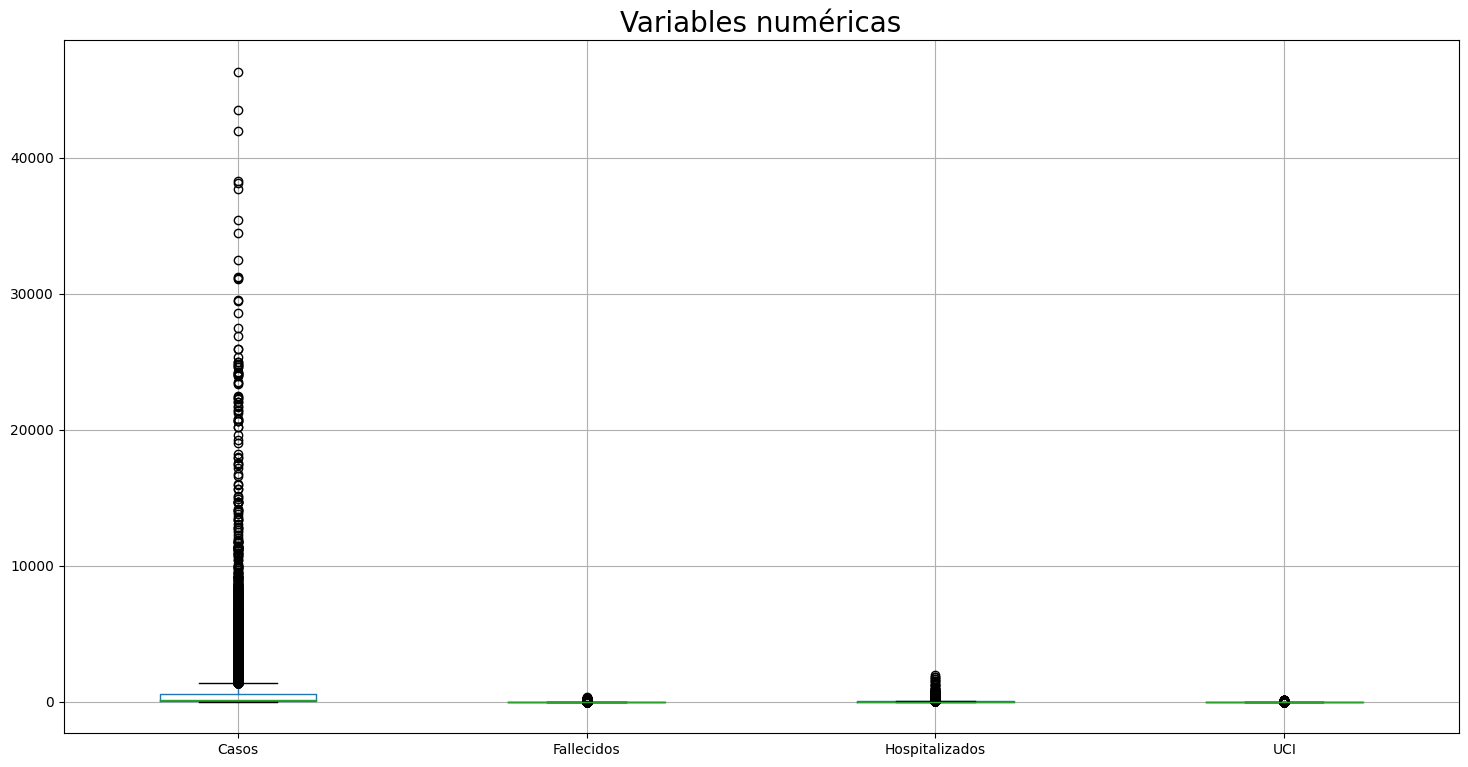

In [11]:
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Variables numéricas", fontsize=20)
plt.show()

In [12]:
df[df['Casos'] > 500]

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
1393,2020-03-10,13,Madrid,660,25,411,34
1413,2020-03-11,13,Madrid,836,25,549,47
1433,2020-03-12,13,Madrid,975,39,584,51
1453,2020-03-13,13,Madrid,889,48,586,76
1473,2020-03-14,13,Madrid,899,64,637,66
...,...,...,...,...,...,...,...
17832,2022-06-10,12,Galicia,984,2,50,1
17833,2022-06-10,13,Madrid,2660,1,105,3
17836,2022-06-10,16,País Vasco,590,0,0,0
17849,2022-06-11,9,Cataluña,671,0,18,0


## Comprobamos que son registros válidos pese a ser outliers, por lo que no se realizan modificaciones ni transformaciones.

# Transformación de variables

In [13]:
df.dtypes

Fecha             object
cod_ine            int64
CCAA              object
Casos              int64
Fallecidos         int64
Hospitalizados     int64
UCI                int64
dtype: object

## La variable flecha es de tipo string, se debe cambiar a datetime. 'cod_ine' debería ser un string.

In [14]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['cod_ine'] = df['cod_ine'].astype(str)

df.dtypes

Fecha             datetime64[ns]
cod_ine                   object
CCAA                      object
Casos                      int64
Fallecidos                 int64
Hospitalizados             int64
UCI                        int64
dtype: object

In [15]:
pd.unique(df['CCAA'])

array(['No consta', 'Andalucía', 'Aragón', 'Asturias', 'Baleares',
       'Canarias', 'Cantabria', 'Castilla y León', 'Castilla La Mancha',
       'Cataluña', 'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid',
       'Murcia', 'Navarra', 'País Vasco', 'La Rioja', 'Ceuta', 'Melilla'],
      dtype=object)

In [16]:
len(pd.unique(df['CCAA']))

20

In [17]:
df = df[df['CCAA'] != 'No consta']
df

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
1,2020-01-01,1,Andalucía,0,0,3,0
2,2020-01-01,2,Aragón,0,0,0,0
3,2020-01-01,3,Asturias,0,0,0,0
4,2020-01-01,4,Baleares,0,0,0,0
5,2020-01-01,5,Canarias,0,0,0,0
...,...,...,...,...,...,...,...
17895,2022-06-13,15,Navarra,0,0,0,0
17896,2022-06-13,16,País Vasco,24,0,0,0
17897,2022-06-13,17,La Rioja,0,0,0,0
17898,2022-06-13,18,Ceuta,0,0,0,0


In [18]:
pd.unique(df['CCAA'])

array(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias',
       'Cantabria', 'Castilla y León', 'Castilla La Mancha', 'Cataluña',
       'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid', 'Murcia',
       'Navarra', 'País Vasco', 'La Rioja', 'Ceuta', 'Melilla'],
      dtype=object)

In [19]:
df['CCAA'].value_counts()

Andalucía             895
Extremadura           895
Ceuta                 895
La Rioja              895
País Vasco            895
Navarra               895
Murcia                895
Madrid                895
Galicia               895
C. Valenciana         895
Aragón                895
Cataluña              895
Castilla La Mancha    895
Castilla y León       895
Cantabria             895
Canarias              895
Baleares              895
Asturias              895
Melilla               895
Name: CCAA, dtype: int64

# Correlación

In [20]:
df.corr() # devuelve un dataframe con todas las variables y la relación existente entre ellas

<ipython-input-20-c6cc27be7813>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # devuelve un dataframe con todas las variables y la relación existente entre ellas


,Casos,Fallecidos,Hospitalizados,UCI
Casos,1.000000,0.261510,0.362783,0.301443
Fallecidos,0.261510,1.000000,0.830127,0.759648
Hospitalizados,0.362783,0.830127,1.000000,0.922549
UCI,0.301443,0.759648,0.922549,1.000000


<ipython-input-21-f3dcacece4d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')


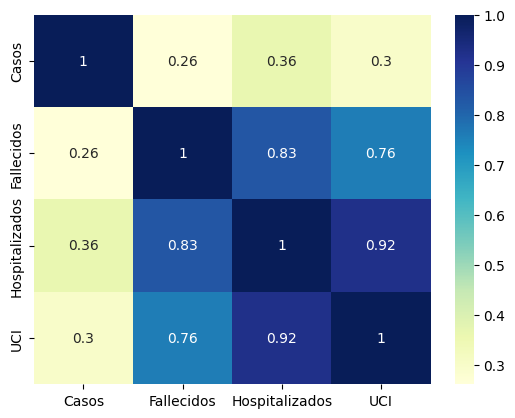

In [21]:
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')
plt.show()

<ipython-input-22-11928c89b839>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


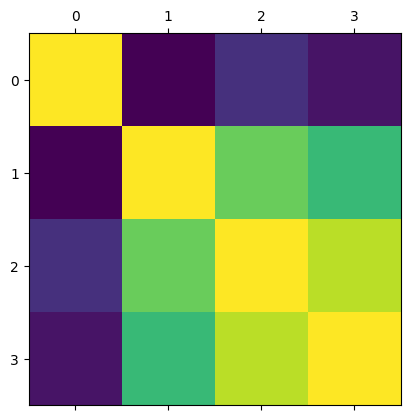

In [22]:
plt.matshow(df.corr())
plt.show()